In [ ]:
# import Required Libraries
import pandas as pd
import seaborn as sns

In [ ]:
# Cleaning data
house_data = pd.read_csv("HousePricePrediction.csv")
# Drop Id col
house_data.drop("Id", axis=1, inplace=True)
# Fill missing values
house_data.fillna(house_data.mean(numeric_only=True), inplace=True)

house_data.head()

,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

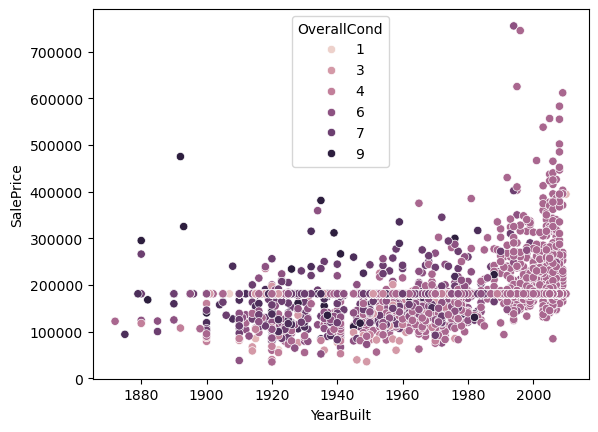

In [ ]:
# Explore the data with graph
sns.scatterplot(data= house_data, x="YearBuilt", y="SalePrice", hue="OverallCond")

In [13]:
house_data["MSZoning"].unique()
house_data.shape

(2919, 12)

In [14]:
# Conver the data in Numerical from
house_data= pd.get_dummies(house_data, drop_first=True)
house_data = house_data.astype(int)
house_data.head()

,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice,MSZoning_FV,MSZoning_RH,...,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,60,8450,5,2003,2003,0,856,208500,0,0,...,0,0,0,0,0,0,0,1,0,0
1,20,9600,8,1976,1976,0,1262,181500,0,0,...,0,0,0,1,0,0,0,0,0,0
2,60,11250,5,2001,2002,0,920,223500,0,0,...,0,0,0,0,0,0,0,1,0,0
3,70,9550,5,1915,1970,0,756,140000,0,0,...,0,0,0,0,0,0,0,0,1,0
4,60,14260,5,2000,2000,0,1145,250000,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
# spliting data for trainig
X = house_data.drop("SalePrice", axis=1)
y = house_data["SalePrice"]


In [ ]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# Train the model

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# Predict the data
y_pred = model.predict(X_test)


In [23]:
y_pred


array([169049.83619136, 186094.16591279, 152824.39051408, 188001.85524736,
       202348.10399082, 229861.42854818, 134842.56123662, 202032.16756041,
       127600.09127438, 182138.78163338, 166738.08944   , 188395.81040786,
       180659.65922245, 192064.77344578, 192387.38571578, 197742.4971689 ,
       163531.18213392, 206411.43503759, 147273.27055234, 169547.02556081,
       205213.47727055, 150123.97770063, 135370.82215543, 205885.66786253,
       191991.98184166, 197615.13800796, 192034.61944145, 152618.92732883,
       186249.67638606, 169006.9070949 , 216558.10799409, 155463.07420268,
       201197.62635184, 195135.92480594, 196126.1768801 , 205625.56376218,
       163534.51842338, 166924.11583466, 157807.46812527, 164593.64239062,
       134470.93673625, 195419.71098243, 219520.23342295, 183195.0493754 ,
       176997.4900633 , 187833.08937137, 190761.80324971, 185346.14680249,
       196886.30860378, 224308.62217663, 151837.71842326, 165279.12298869,
       150483.10075217, 1

In [24]:
# check how data is correct
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 32733.63373373184
MSE: 2365413824.205868
R2 Score: 0.3368080182160763


In [25]:
house_data.shape

(2919, 34)

In [ ]:
# Testing model perfromance
y_testing = model.predict(X_train)
print("R2 Score:", r2_score(y_train, y_testing))


R2 Score: 0.3054885356391699
